# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
**Import numpy and pandas**

In [2]:
import numpy as np
import pandas as pd

**import visualization libraries and set %matplotlib inline.**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context = 'talk', style = 'darkgrid')
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [4]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?** 

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**How many unique title codes are there?**

In [9]:
df['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. I use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [10]:
func = lambda reason : str(reason).split(':')[0]
df['Reason'] = df['title'].apply(func)
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

**What is the most common Reason for a 911 call based off of this new column?**

In [11]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='Reason', ylabel='count'>

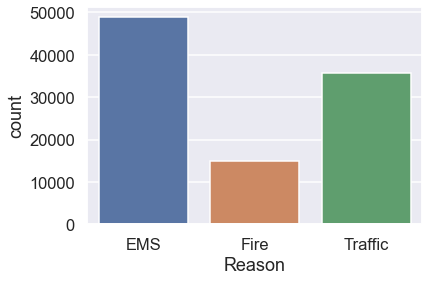

In [12]:
sns.countplot(data = df, x = 'Reason')

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [13]:
type(df['timeStamp'][0])

str

**I use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**We can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Now that the timestamp column are actually DateTime objects, I use .apply() to create 3 new columns called Hour, Month, and Day of Week. I create these columns based off of the timeStamp column.**

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day'] = df['timeStamp'].apply(lambda time:time.day_of_week)

**The Day of Week is an integer 0-6. I Use the .map() with this dictionary to map the actual string names to the day of the week.**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Day'] = df['Day'].map(dmap)

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

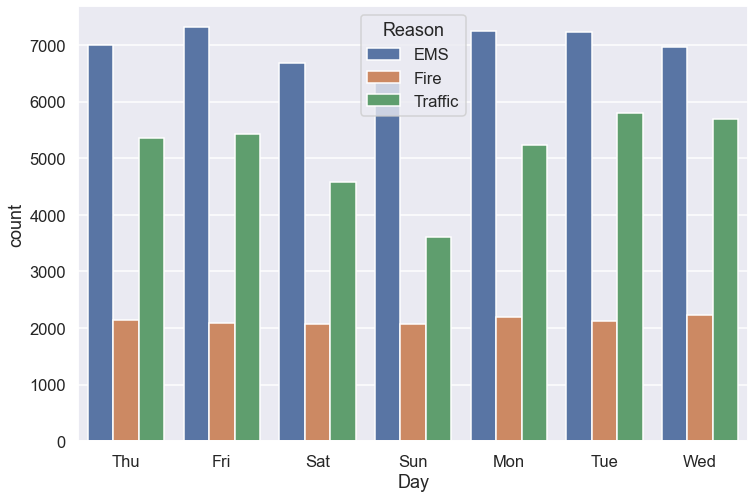

In [20]:
plt.figure(figsize = (12,8))
sns.countplot(data = df, x = 'Day', hue = 'Reason', dodge = True);

**Now I do the same for Month:**

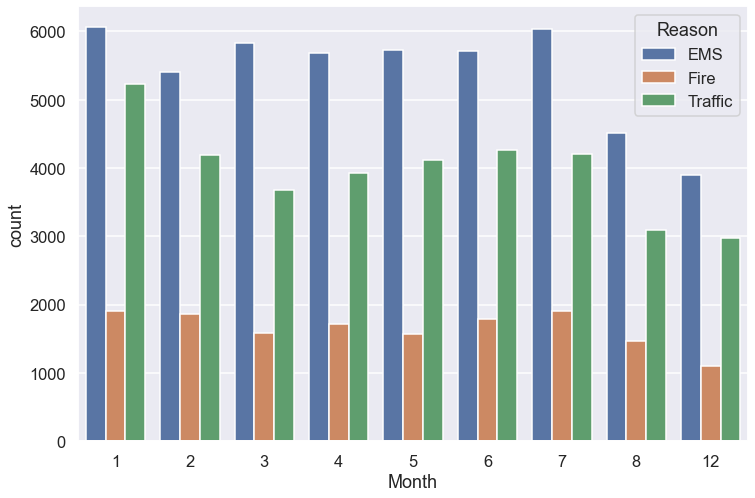

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = 'Month', hue = 'Reason');


_____

**The plot is missing some Months, we can fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**I will create a groupby object called byMonth, where I group the DataFrame by the month column and use the count() method for aggregation.**

In [23]:
byMonth = df.groupby('Month')
byMonth.count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now I create a simple plot off of the dataframe indicating the count of calls per month. **

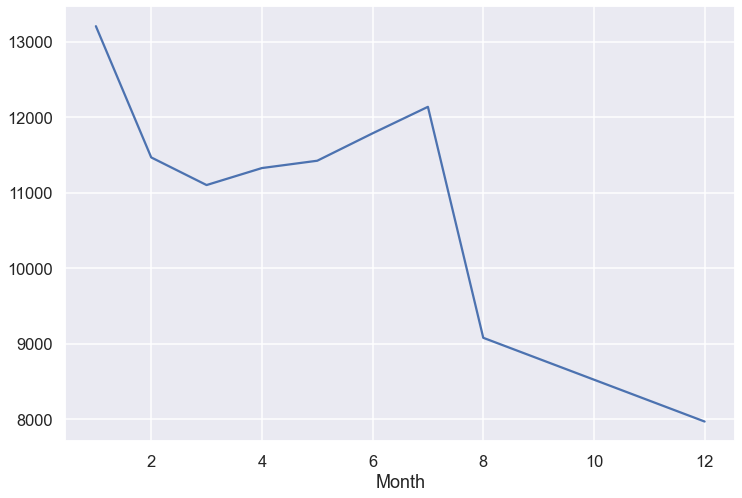

In [36]:
plt.figure(figsize = (12,8))
byMonth.count()['lat'].plot();

**Now see I will use seaborn's lmplot() to create a linear fit on the number of calls per month after resetting the index.**

<Figure size 864x1296 with 0 Axes>

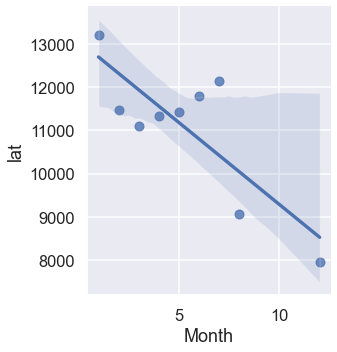

In [34]:
plt.figure(figsize = (12,18));
sns.lmplot(data = byMonth.count().reset_index(), x = 'Month', y = 'lat');

**I am creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [37]:
df['Date'] = df['timeStamp'].apply(lambda time:time.date())

**Now I'll groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

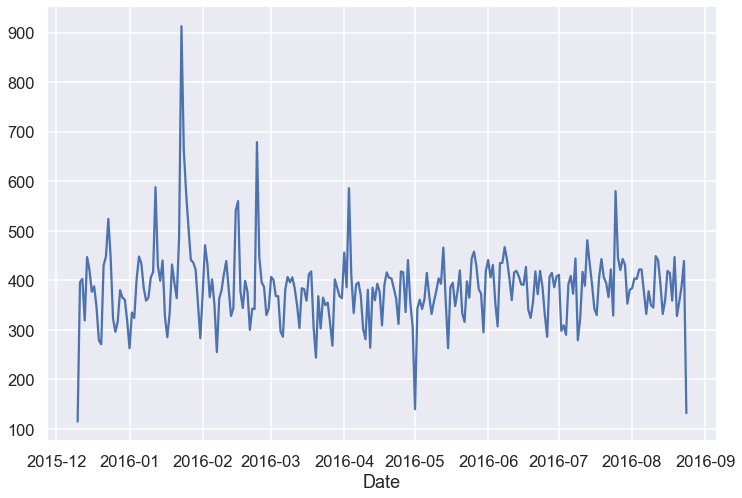

In [42]:
plt.figure(figsize=(12,8))
byDate= df.groupby('Date')
byDate.count()['lat'].plot();

**Now I'll recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

<AxesSubplot:xlabel='Date'>

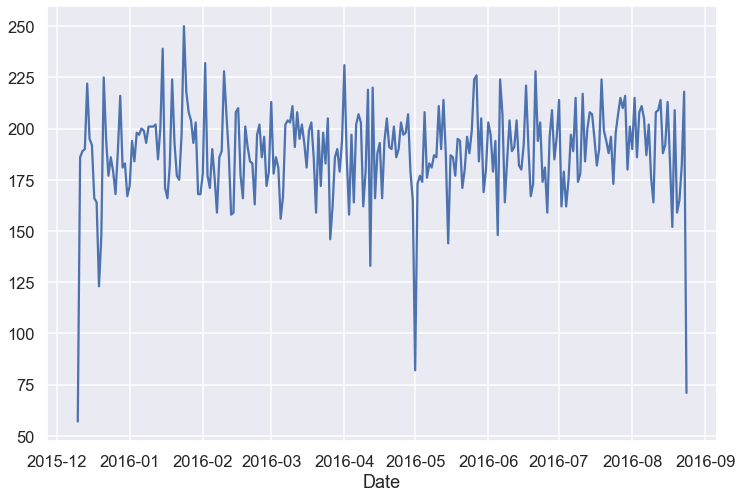

In [43]:
plt.figure(figsize=(12,8))
byEMS = df[df['Reason'] == 'EMS'].groupby('Date')
byEMS.count()['lat'].plot()

<AxesSubplot:title={'center':'Fire'}, xlabel='Date'>

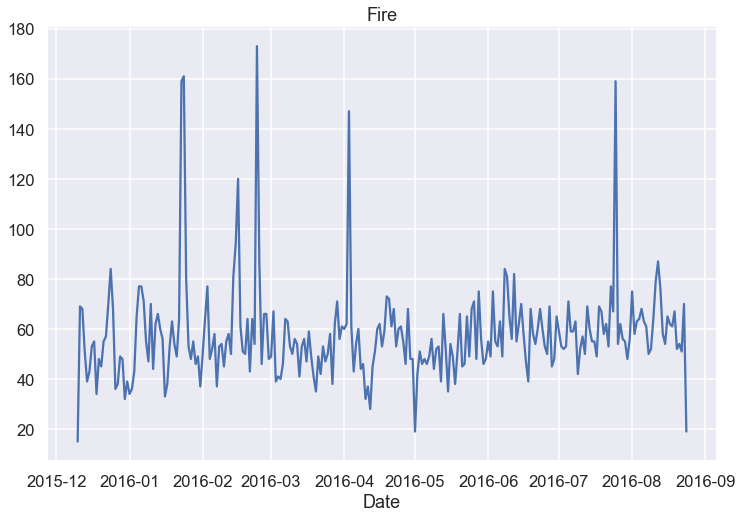

In [44]:
plt.figure(figsize=(12,8))
byFire = df[df['Reason'] == 'Fire'].groupby('Date')
byFire.count()['lat'].plot(title = 'Fire')

<AxesSubplot:title={'center':'Traffic'}, xlabel='Date'>

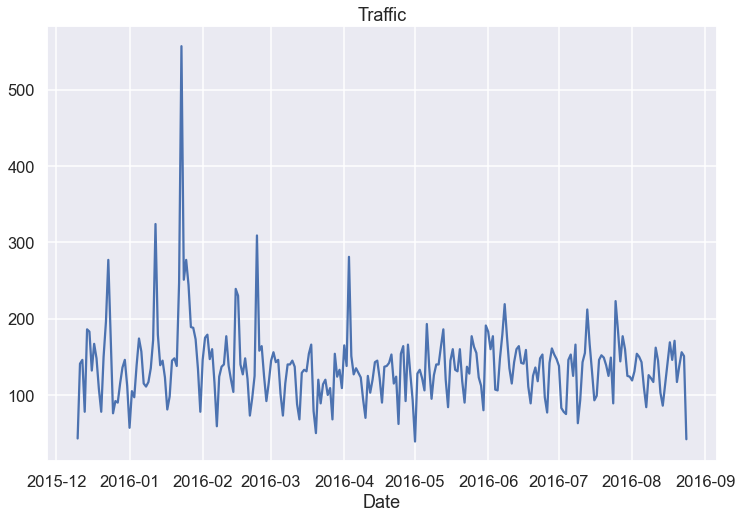

In [45]:
plt.figure(figsize = (12,8))
byTraffic = df[df['Reason'] == 'Traffic'].groupby('Date')
byTraffic.count()['lat'].plot(title = 'Traffic')

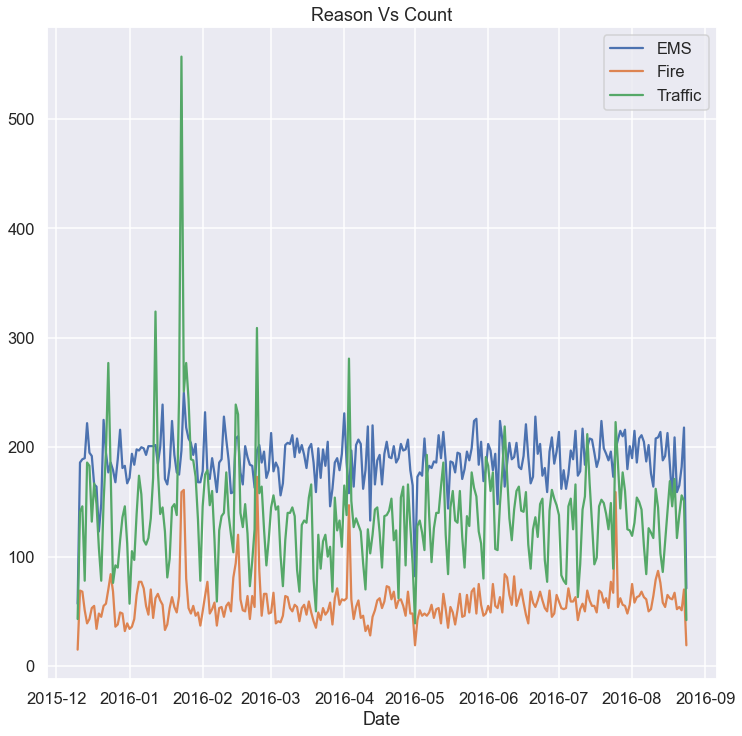

In [58]:
plt.figure(figsize = (12,12))
byEMS.count()['lat'].plot(label = 'EMS')
byFire.count()['lat'].plot( label = 'Fire' )
byTraffic.count()['lat'].plot(label = 'Traffic')
plt.title('Reason Vs Count')
plt.legend();

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. I would do this by combining groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

In [59]:
byHourDay = df.groupby(by = ['Month', 'Day'])
df2 = byHourDay.count().unstack(level = 0)['Reason'].head()
df2.head()

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


**Now I'll create a HeatMap using this new DataFrame. **

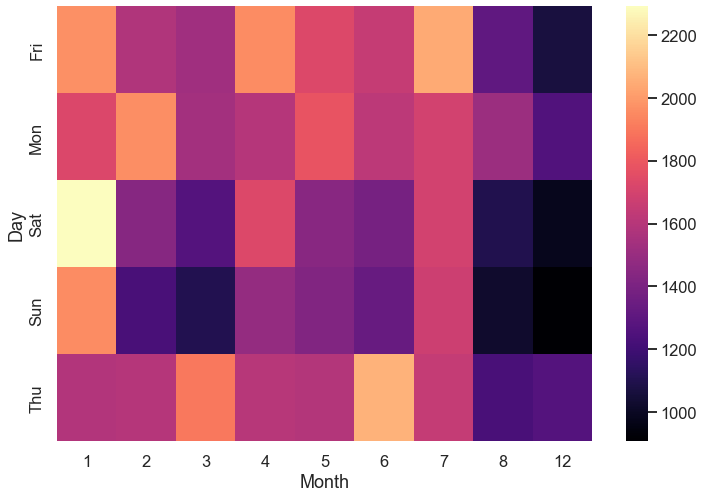

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(df2, cmap='magma');

**Now I'll create a clustermap using this DataFrame.**

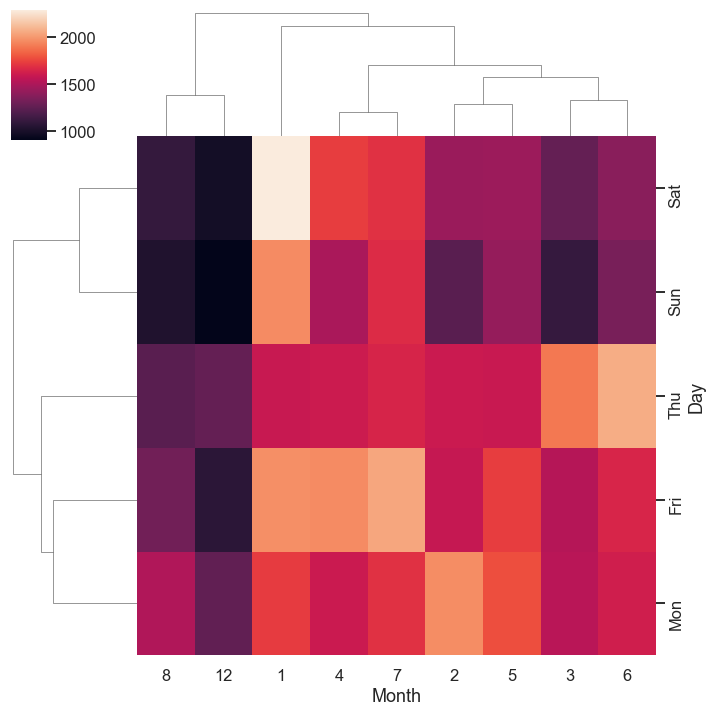

In [70]:
sns.clustermap(df2)

**Now I'll repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [71]:
df3 = df2.unstack().unstack(level = -1)

<AxesSubplot:xlabel='Day', ylabel='Month'>

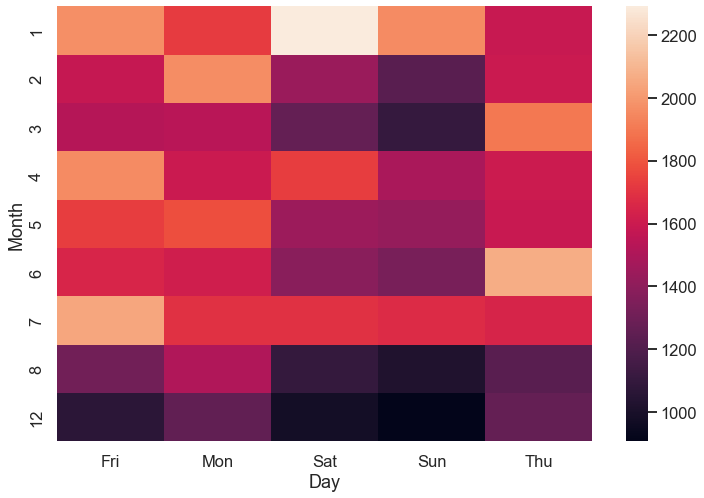

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(df3)

<Figure size 864x576 with 0 Axes>

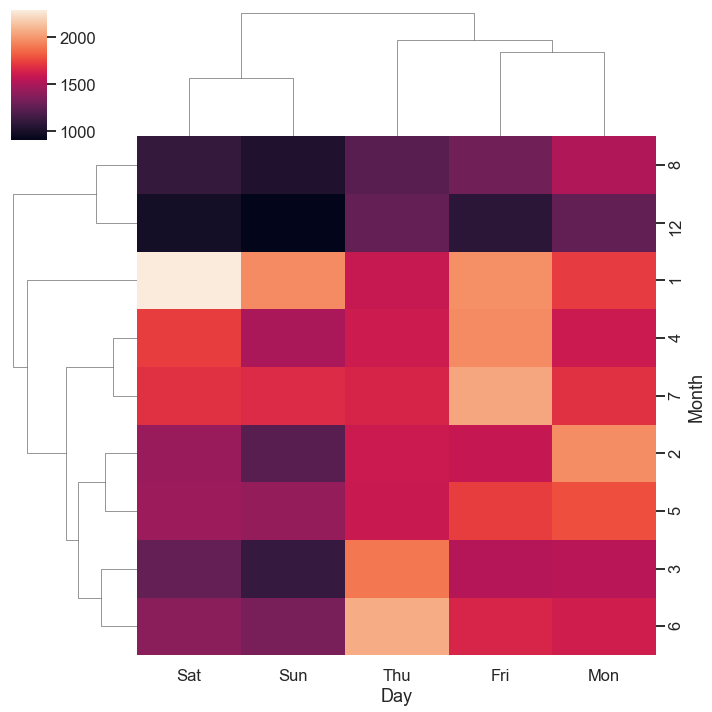

In [73]:
plt.figure(figsize = (12,8))
sns.clustermap(df3)

---
# End
---